In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from datetime import date
date.today()

datetime.date(2020, 4, 2)

In [3]:
author = "kyubyong. https://github.com/Kyubyong/numpy_exercises"

In [4]:
np.__version__

'1.18.1'

### Complex Numbers

Q1. Return the angle of `a` in radian.

In [9]:
a = 1+1j
output = np.angle(a) # вычисляет угол каждого комплексного числа в массиве
print(output)

0.7853981633974483


Q2. Return the real part and imaginary part of `a`.

In [10]:
a = np.array([1+2j, 3+4j, 5+6j])
real = a.real # извлекает вещественную часть комплексного числа
imag = a.imag # извлекает мнимую часть комплексного числа
print("real part=", real)
print("imaginary part=", imag)

real part= [1. 3. 5.]
imaginary part= [2. 4. 6.]


Q3. Replace the real part of a with `9`, the imaginary part with `[5, 7, 9]`.

In [15]:
a = np.array([1+2j, 3+4j, 5+6j])
a.real = 9 # присваивает поэлементно значение вещественной части комплексного числа
a.imag = [5,7,9] # # присваивает поэлементно значение мнимой части комплексного числа
print(a)

[9.+5.j 9.+7.j 9.+9.j]


Q4. Return the complex conjugate of `a`.

In [16]:
a = 1+2j
output = np.conj(a) # возвращает комплексно-сопряженный элемент, т.е. для каждого входного числа, возвращает число у которого такаяже действительная и мнимая часть, но мнимая часть имеет противоположный знак
print(output)

(1-2j)


### Discrete Fourier Transform

Q5. Compuete the one-dimensional DFT of `a`.

In [25]:
a = np.exp(2j * np.pi * np.arange(8))
print(a,'\n')
output = np.fft.fft(a) # одномерное дискретное преобразование Фурье
print(output)

[1.+0.00000000e+00j 1.-2.44929360e-16j 1.-4.89858720e-16j
 1.-7.34788079e-16j 1.-9.79717439e-16j 1.-1.22464680e-15j
 1.-1.46957616e-15j 1.-1.71450552e-15j] 

[ 8.00000000e+00-6.85802208e-15j  2.36524713e-15+9.79717439e-16j
  9.79717439e-16+9.79717439e-16j  4.05812251e-16+9.79717439e-16j
  0.00000000e+00+9.79717439e-16j -4.05812251e-16+9.79717439e-16j
 -9.79717439e-16+9.79717439e-16j -2.36524713e-15+9.79717439e-16j]


Q6. Compute the one-dimensional inverse DFT of the `output` in the above question.

In [27]:
print("a=", a)
inversed = np.fft.ifft(a) #  одномерное обратное преобразование Фурье
print("inversed=", a)

a= [1.+0.00000000e+00j 1.-2.44929360e-16j 1.-4.89858720e-16j
 1.-7.34788079e-16j 1.-9.79717439e-16j 1.-1.22464680e-15j
 1.-1.46957616e-15j 1.-1.71450552e-15j]
inversed= [1.+0.00000000e+00j 1.-2.44929360e-16j 1.-4.89858720e-16j
 1.-7.34788079e-16j 1.-9.79717439e-16j 1.-1.22464680e-15j
 1.-1.46957616e-15j 1.-1.71450552e-15j]


Q7. Compute the one-dimensional discrete Fourier Transform for real input `a`.

In [31]:
a = [0, 1, 0, 0]
output = np.fft.rfft(a) # Считает одномерное дискретное преобразование Фурье для вещественной части
print(output)
assert output.size==len(a)//2+1 if len(a)%2==0 else (len(a)+1)//2

output2 = np.fft.fft(a)  # Считает одномерное дискретное преобразование Фурье для всего числа
print(output2)

[ 1.+0.j  0.-1.j -1.+0.j]
[ 1.+0.j  0.-1.j -1.+0.j  0.+1.j]


Q8. Compute the one-dimensional inverse DFT of the output in the above question.

In [35]:
inversed = np.fft.ifft(output) # одномерное обратное преобразование Фурье (переменная из примера выше)
print("inversed=", a)

inversed= [0, 1, 0, 0]


Q9. Return the DFT sample frequencies of `a`.

In [54]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=np.float32)
n = signal.size
print('сигнал {}   с длинной окна {}'.format(signal,n))
timestep = 0.001 # Интервал между выборками (обратный к частоте дискретизации). По умолчанию 1
freq = np.fft.fftfreq(n, d=timestep) # возвращает массив, длинной n, состоящий из выборки частот дескретизации
print(freq)

сигнал [-2.  8.  6.  4.  1.  0.  3.  5.]   с длинной окна 8
[   0.  125.  250.  375. -500. -375. -250. -125.]


### Window Functions

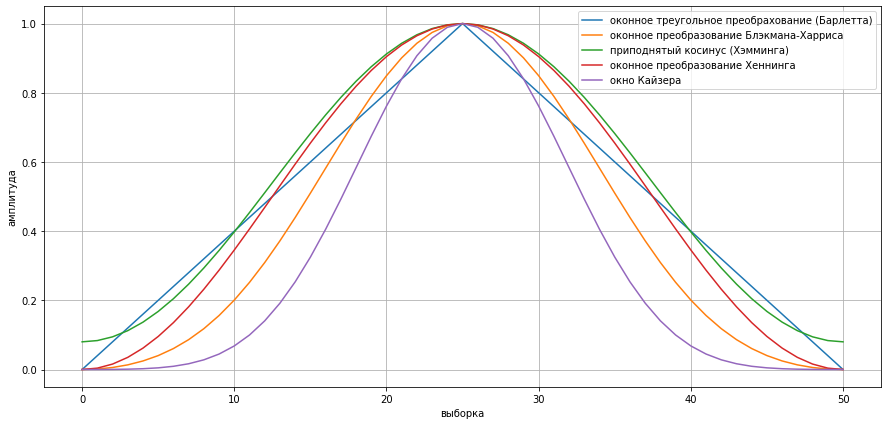

In [73]:
'''
Оконное преобразование Фурье — это разновидность преобразования Фурье,
для визуального улучшения частотного спектра на разрыве границ окна
'''
fig = plt.figure(figsize=(15, 7))

# Hamming window
window = np.hamming(51)
plt.plot(np.bartlett(51), label="оконное треугольное преобрахование (Барлетта)")
plt.plot(np.blackman(51), label="оконное преобразование Блэкмана-Харриса")
plt.plot(np.hamming(51), label="приподнятый косинус (Хэмминга)")
plt.plot(np.hanning(51), label="оконное преобразование Хеннинга")
plt.plot(np.kaiser(51, 14), label="окно Кайзера")
plt.xlabel("выборка")
plt.ylabel("амплитуда")
plt.legend()
plt.grid()

plt.show()